# P02_02_EDA

In [1]:
section_fig_main_title  = 'P02_02_EDA_'

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [3]:
import sys
# print(sys.executable)

In [4]:
import statsmodels.api as sm

In [5]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install matplotlib

In [6]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
%config InlineBackend.figure_format = 'retina'


### Read data

In [137]:
csv_path = "../Data/jena_climate_2009_2016.csv"
df = pd.read_csv(csv_path)# , index_col=0, parse_dates=True)

let's get an intuition of feathers in data by printing the data first 5 rows.

In [138]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [139]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [142]:
df['Date Time'] = pd.to_datetime(df['Date Time'])

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420551 non-null  datetime64[ns]
 1   p (mbar)         420551 non-null  float64       
 2   T (degC)         420551 non-null  float64       
 3   Tpot (K)         420551 non-null  float64       
 4   Tdew (degC)      420551 non-null  float64       
 5   rh (%)           420551 non-null  float64       
 6   VPmax (mbar)     420551 non-null  float64       
 7   VPact (mbar)     420551 non-null  float64       
 8   VPdef (mbar)     420551 non-null  float64       
 9   sh (g/kg)        420551 non-null  float64       
 10  H2OC (mmol/mol)  420551 non-null  float64       
 11  rho (g/m**3)     420551 non-null  float64       
 12  wv (m/s)         420551 non-null  float64       
 13  max. wv (m/s)    420551 non-null  float64       
 14  wd (deg)         420

In [144]:
df.shape

(420551, 15)

In [145]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

Comparing the time series with a past (shift the df)

In [147]:
# df_shifted = df.shift(periods=3)
# df_shifted = df_shifted[3:]
# # df_shifted

In [148]:
# shift_value = 100
# plot_font_size = 20
# column_name = 'T (degC)'



# df_shifted = df.shift(periods=shift_value)
# df_shifted = df_shifted[shift_value:]
# print(df_shifted.index[0])

In [149]:
# from_val = '2009-01-01 01:50:00'
# to_val = '2009-02-01 16:50:00'


# plt.figure(figsize=(22,8))
# df[column_name][from_val:to_val].plot(fontsize=10, label=column_name)
# df_shifted[column_name][from_val:to_val].plot(fontsize=10, label='shifted')
# plt.ylabel(column_name, fontsize=plot_font_size)

# plt.xlabel('date', fontsize=plot_font_size), 
# plt.title(f'{column_name} plot', fontsize=plot_font_size)
# plt.xticks(fontsize=16),plt.yticks(fontsize=16)
# plt.legend()
# plt.show()
# plt.show()

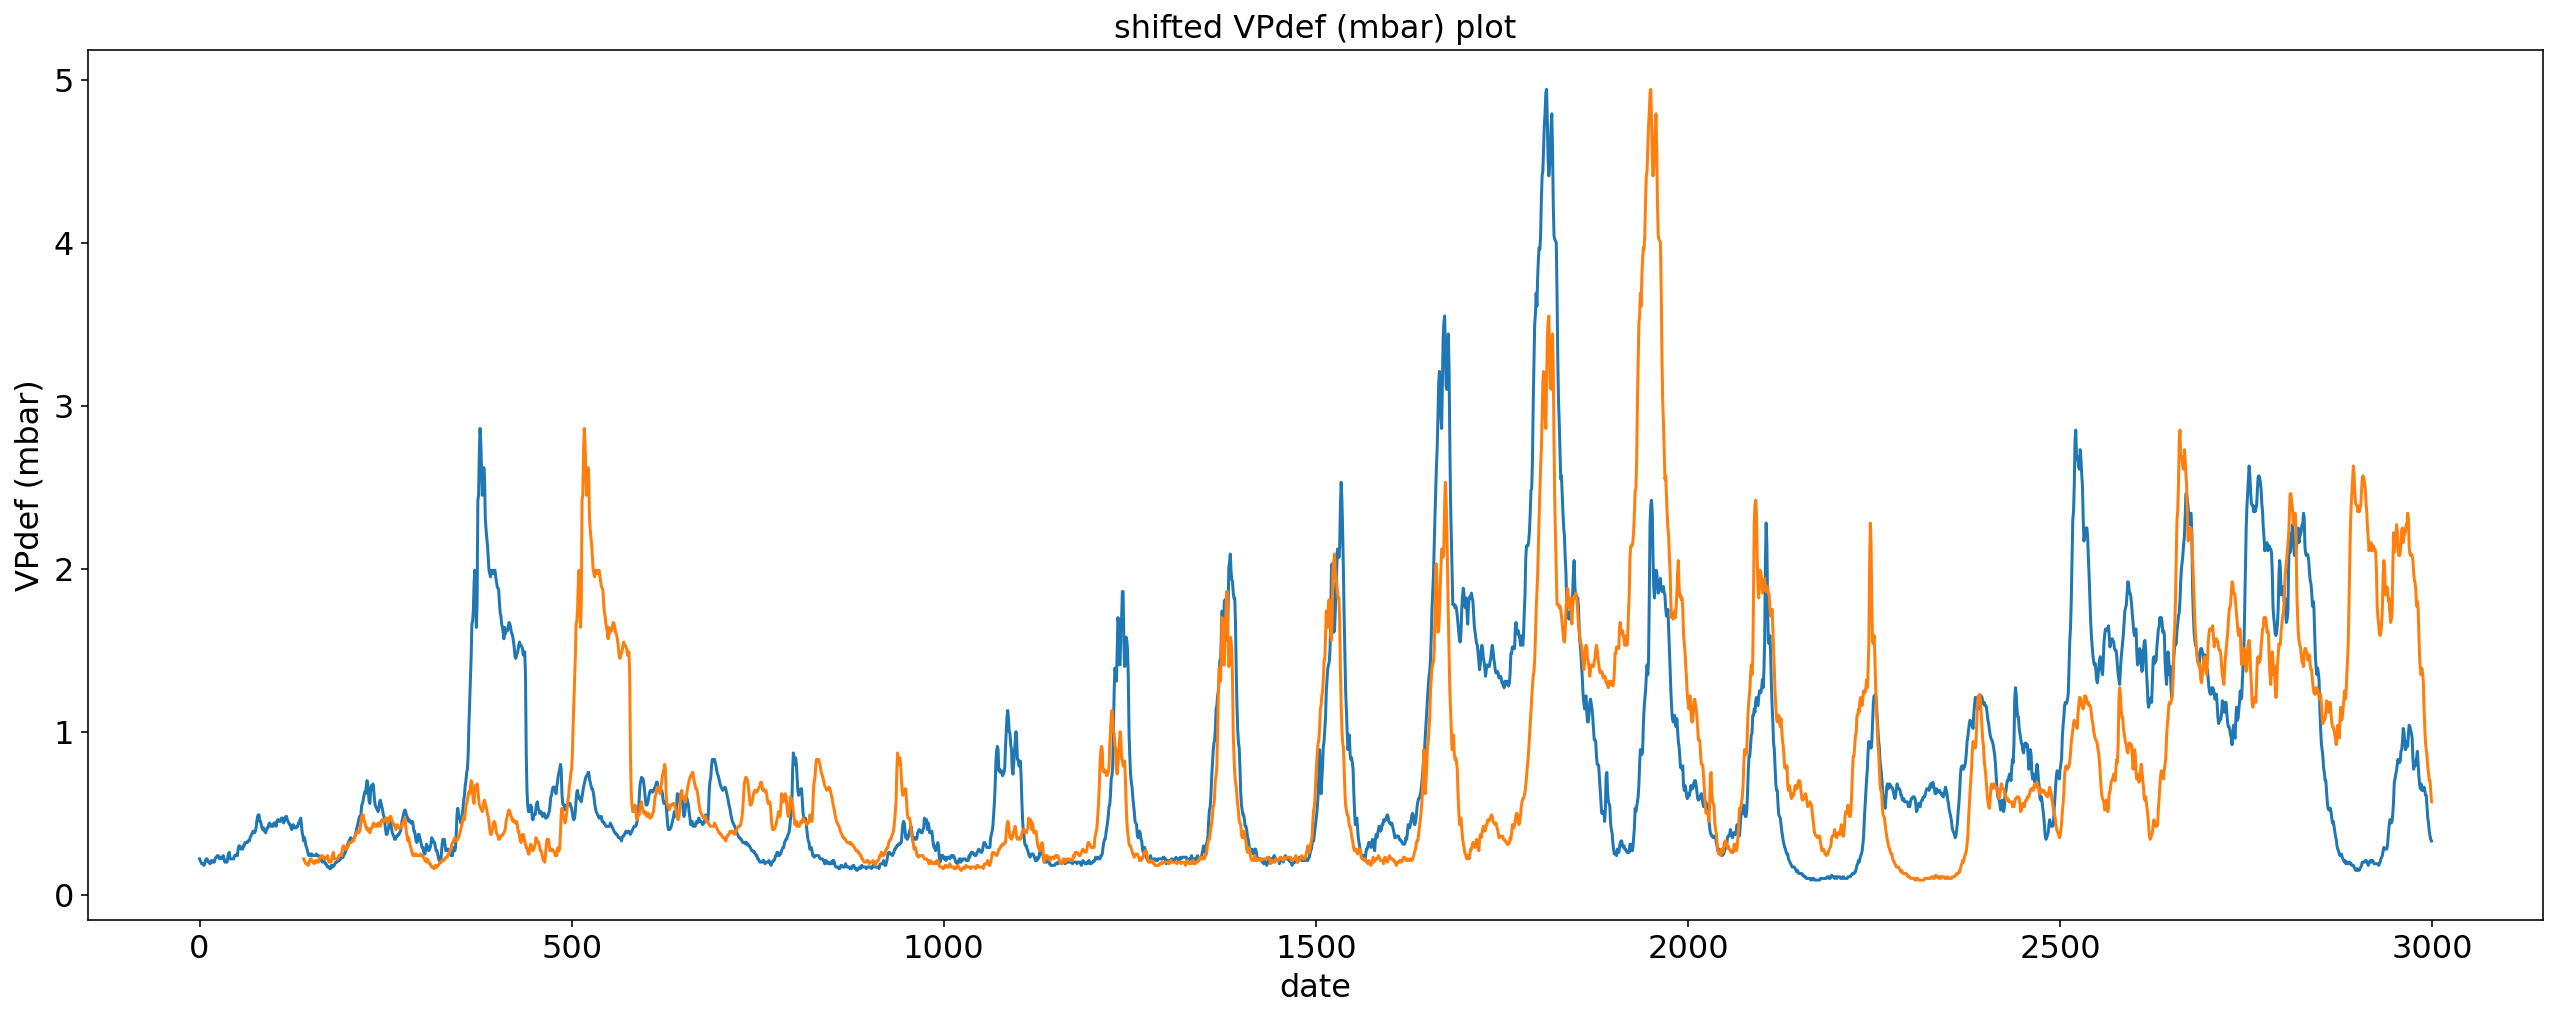

In [150]:
shift_value = 140
from_val = 0
to_val = 3000
plot_font_size = 16
column_name = 'VPdef (mbar)'


plt.figure(figsize=(22,8))
df[column_name][from_val:to_val].plot(fontsize=10)
df_shifted = df.shift(periods=shift_value)
df_shifted[column_name][from_val:to_val].plot(fontsize=10)
plt.ylabel(column_name, fontsize=plot_font_size),plt.xlabel('date', fontsize=plot_font_size), 
plt.title(f'shifted {column_name} plot', fontsize=plot_font_size)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

normalizing data and comparing the timeseries data

In [151]:
# !/Users/amin/Desktop/proj/env/bin/python -m pip install sklearn
from sklearn.preprocessing import MinMaxScaler

In [152]:
cols = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']
ts = df[cols]
ts_norm = (ts - ts.min()) / (ts.max() - ts.min())

In [153]:
ts_norm.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.814939,0.248632,0.243662,0.334788,0.923033,0.037886,0.084272,0.004782,0.081679,0.082798,0.743213,0.997262,0.997830,0.423056
1,0.815430,0.242163,0.237241,0.326891,0.924182,0.036294,0.081003,0.004564,0.078843,0.079586,0.749349,0.997231,0.997805,0.378056
2,0.815037,0.240504,0.235594,0.326268,0.929925,0.035976,0.080639,0.004347,0.078276,0.079229,0.750666,0.997178,0.997718,0.476667
3,0.814840,0.243822,0.239052,0.331255,0.933372,0.036772,0.082819,0.004130,0.080545,0.081370,0.747523,0.997193,0.997705,0.550000
4,0.814840,0.244485,0.239546,0.331879,0.932223,0.036931,0.083182,0.004130,0.080545,0.081727,0.746954,0.997191,0.997718,0.595278


In [154]:
ts_norm.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

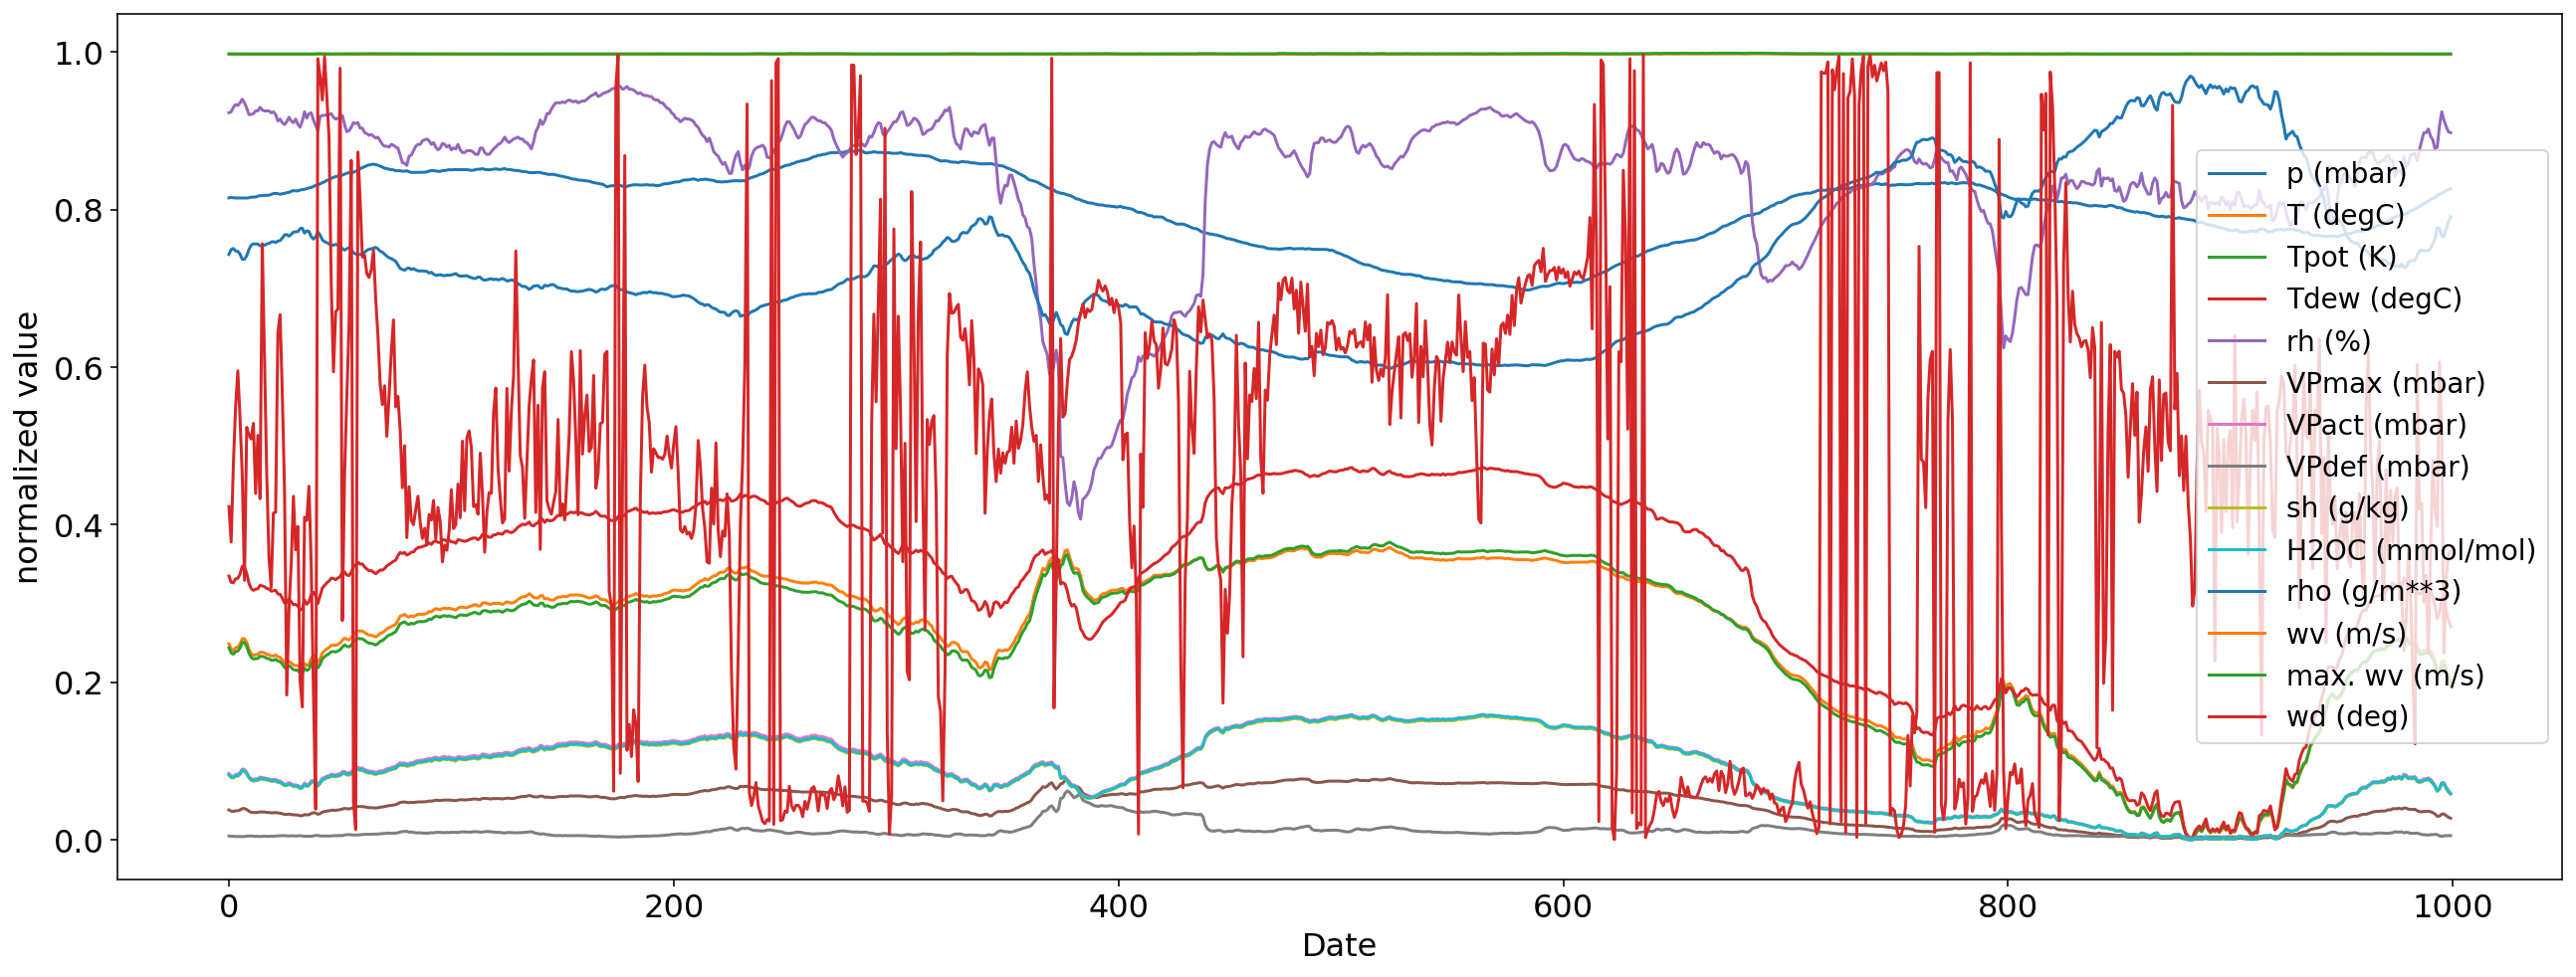

In [155]:
cols = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']


plt.figure(figsize=(22,8))
plt.plot(ts_norm[cols][0:1000],label=cols)
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('normalized value', fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

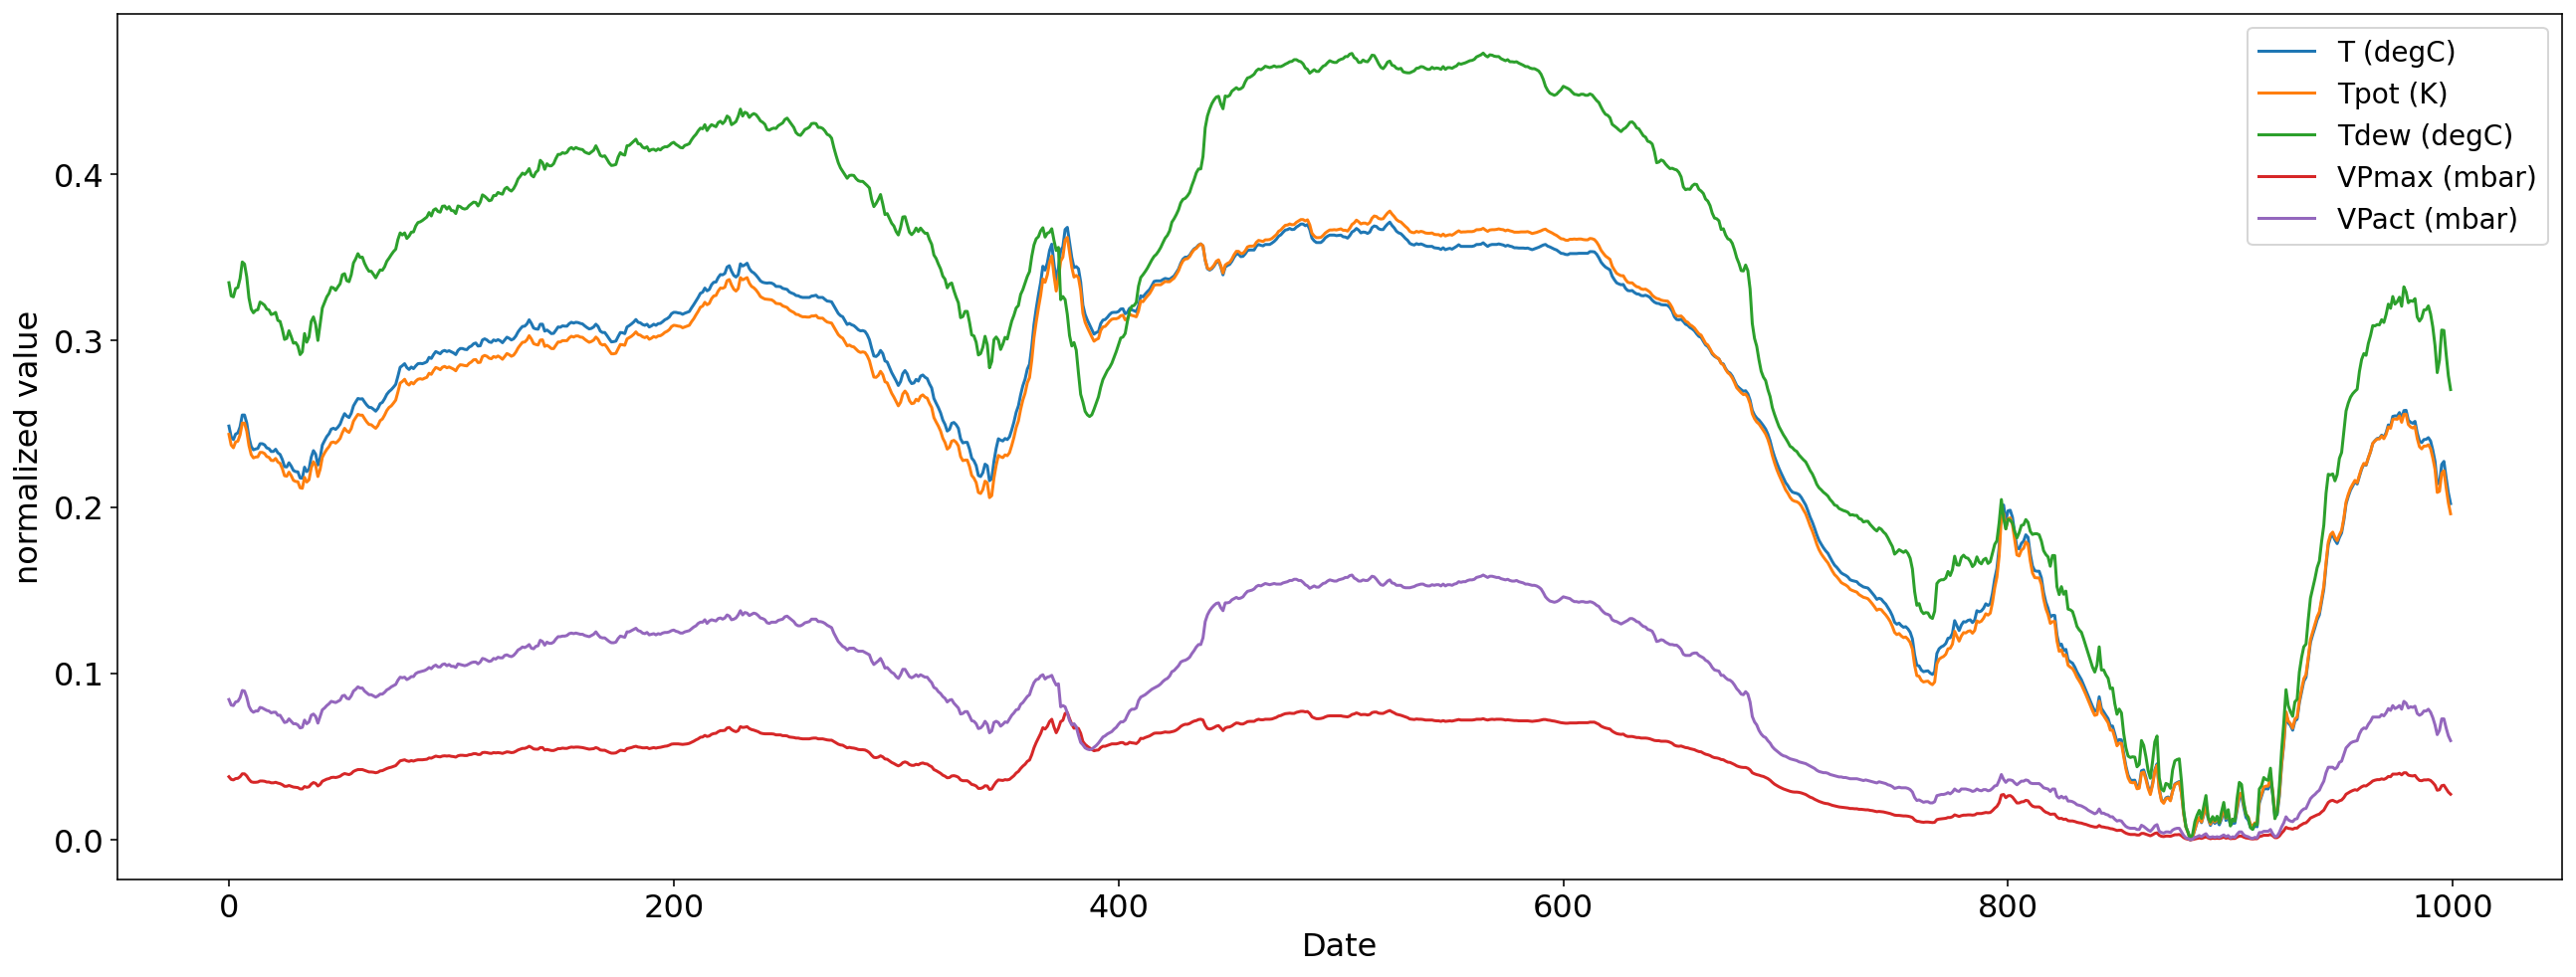

In [156]:
cols = ['T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'VPmax (mbar)', 'VPact (mbar)']


plt.figure(figsize=(22,8))
plt.plot(ts_norm[cols][0:1000],label=cols)
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('normalized value', fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

'T (degC)' and 'Tpot (K)' are overlaid.

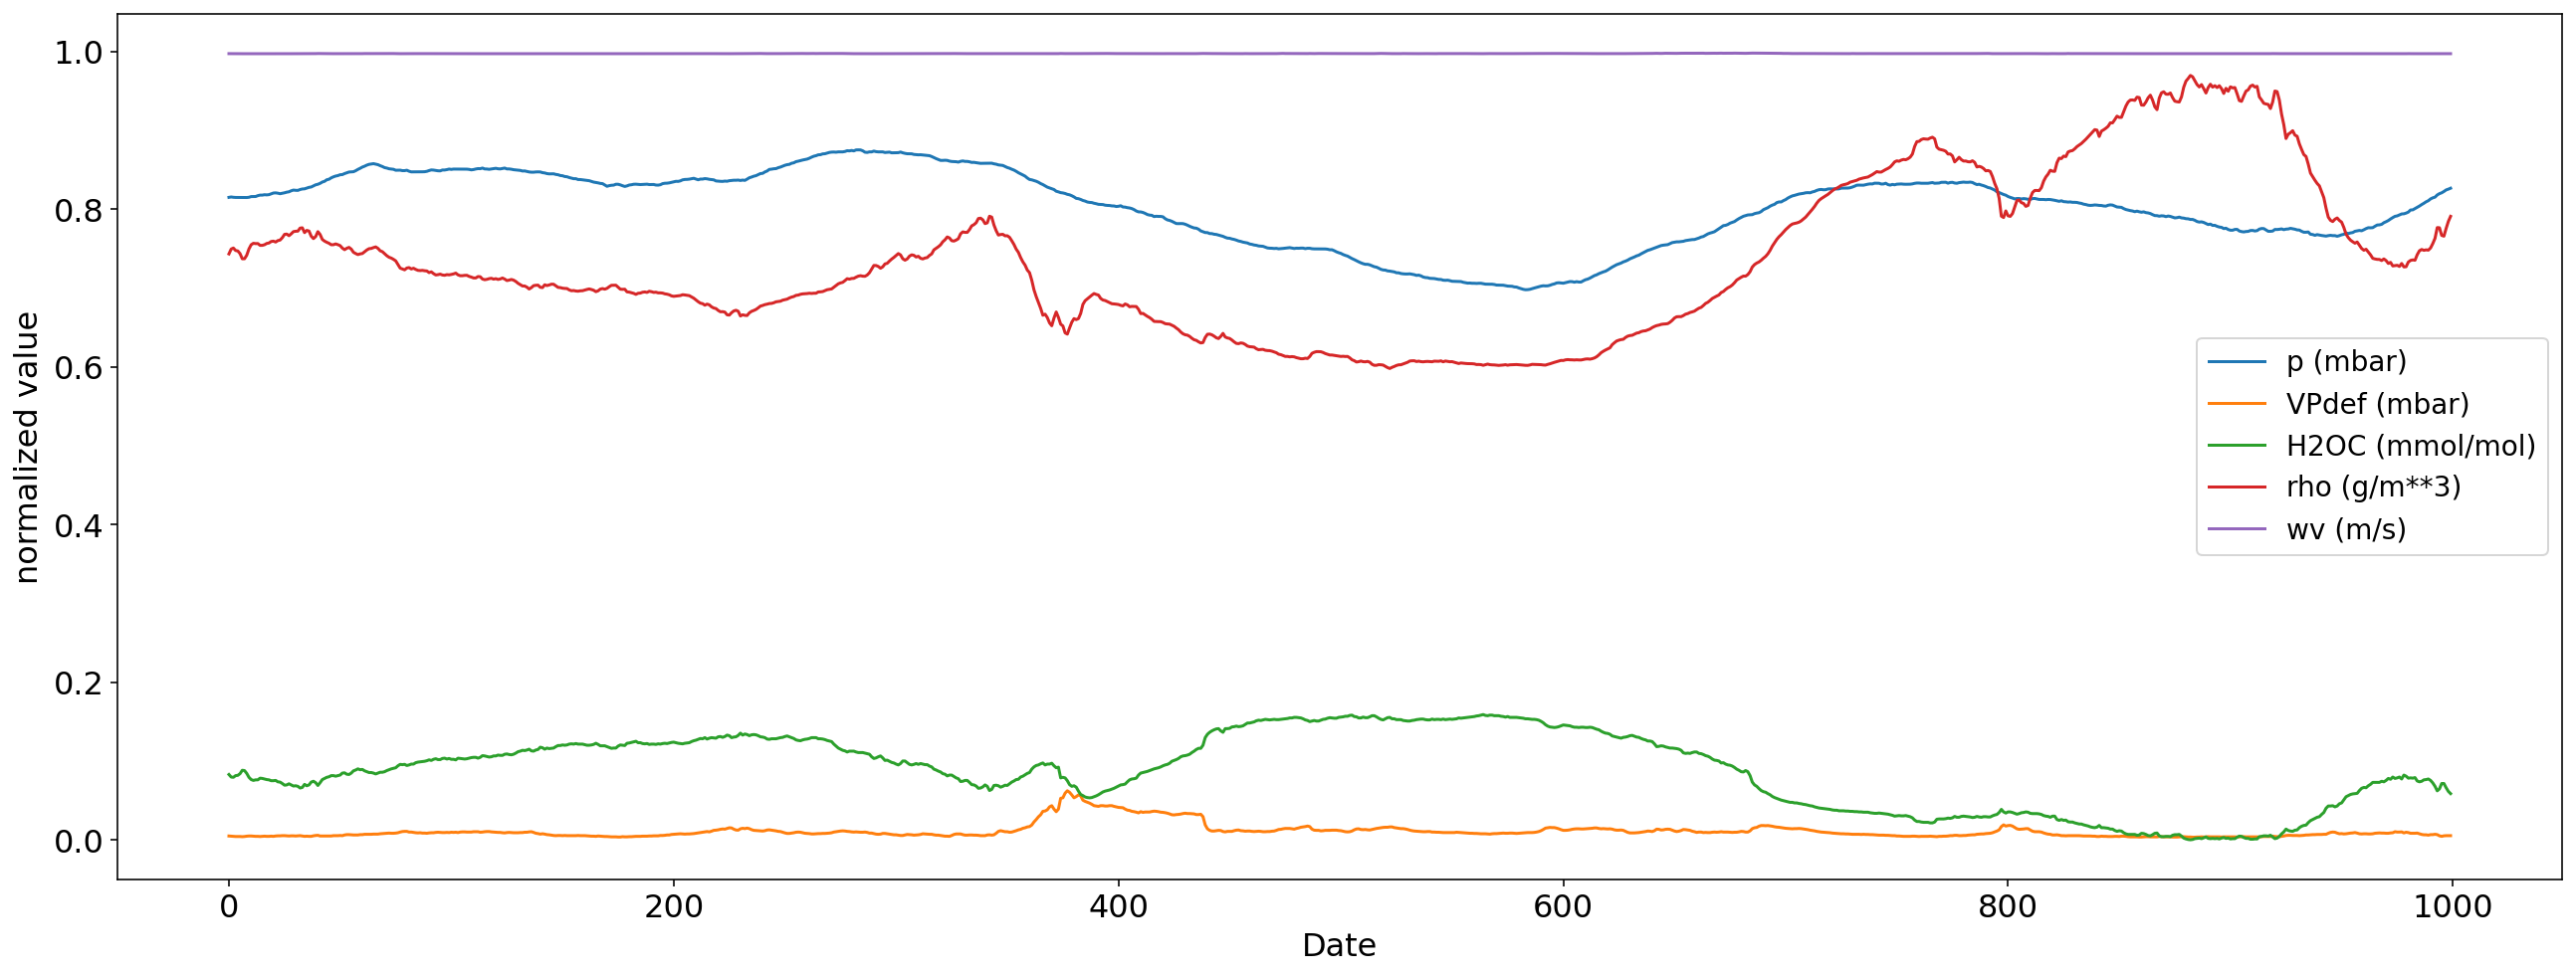

In [157]:
cols = ['p (mbar)', 'VPdef (mbar)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)',
       ]


plt.figure(figsize=(22,8))
plt.plot(ts_norm[cols][0:1000],label=cols)
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('normalized value', fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

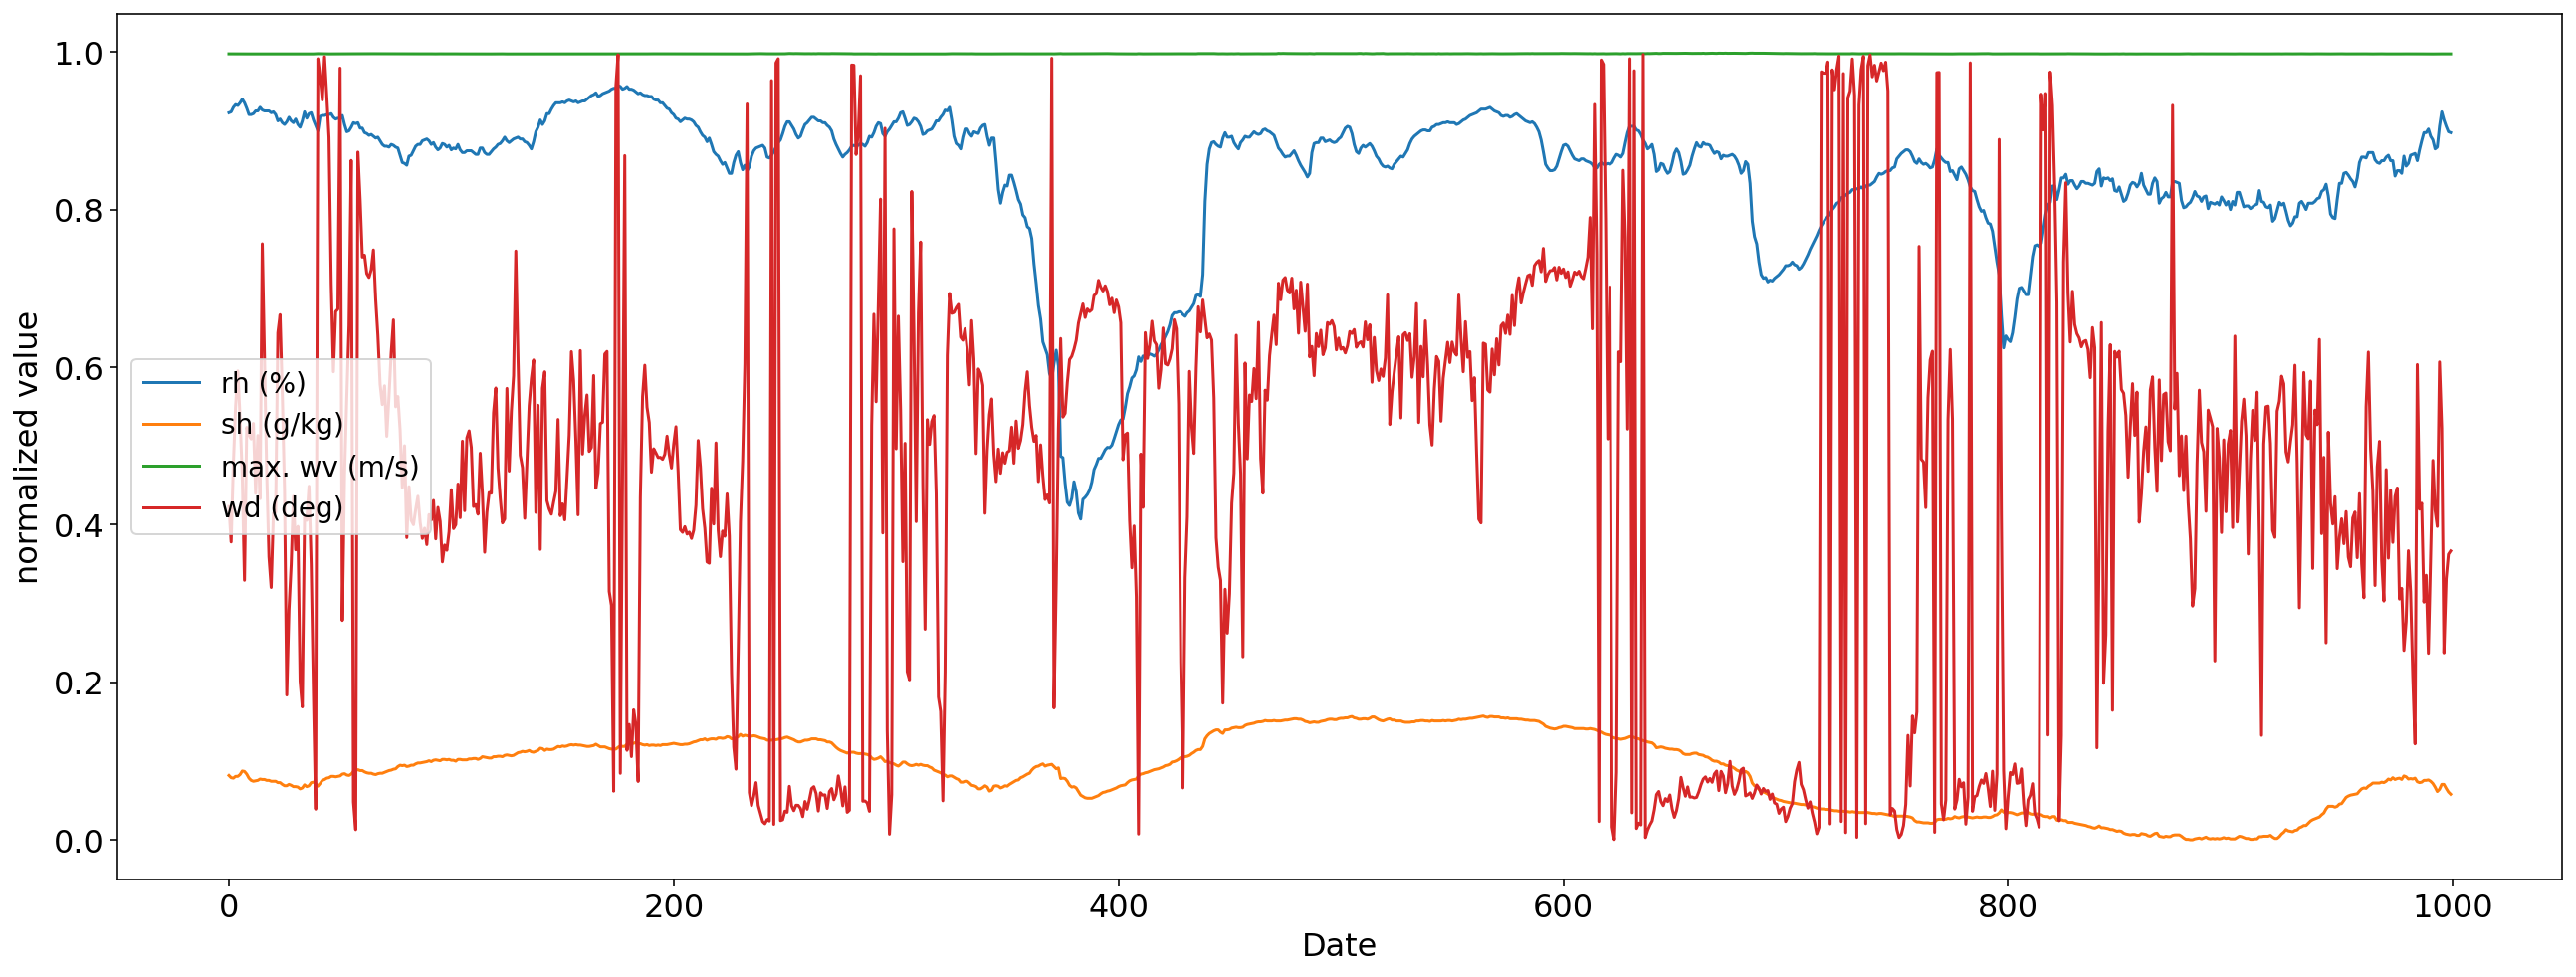

In [158]:
cols = [ 'rh (%)', 'sh (g/kg)', 'max. wv (m/s)',
       'wd (deg)']


plt.figure(figsize=(22,8))
plt.plot(ts_norm[cols][0:1000],label=cols)
plt.legend(fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel('normalized value', fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

it is seen that the 'sh (g/kg)' and H2OC (mmol/mol) are overlaid. The 'max. wv (m/s)' is constant.

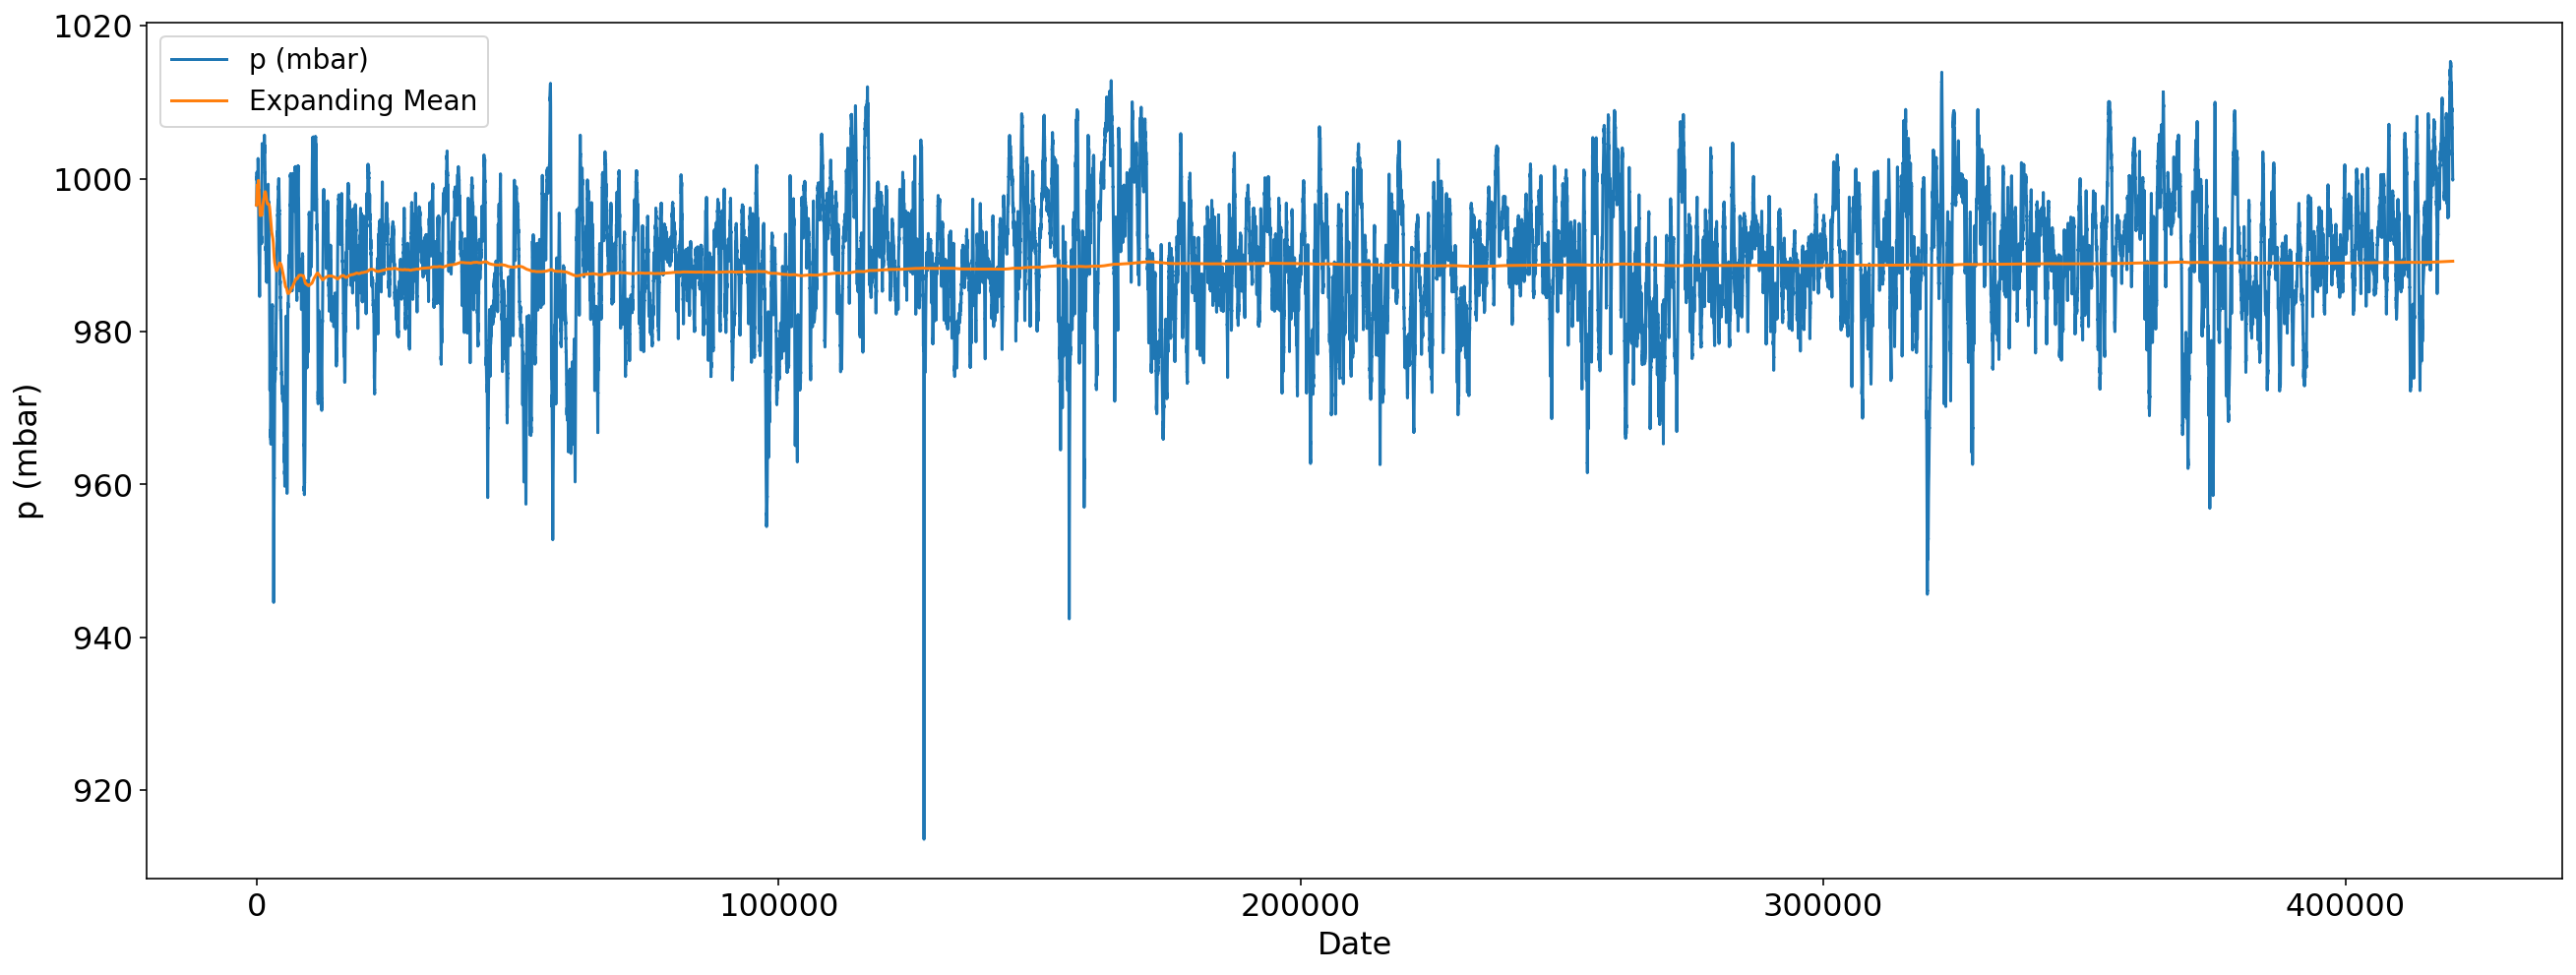

In [159]:
# ref: https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
plt.figure(figsize=(22,8))
col_name = 'p (mbar)'
df_mean = df[col_name].expanding().mean()
# df_std = df['p (mbar)'][0:1000].expanding().std()
df[col_name].plot()
df_mean.plot()
# df_std.plot()
plt.legend([col_name, 'Expanding Mean'], fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel(col_name, fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

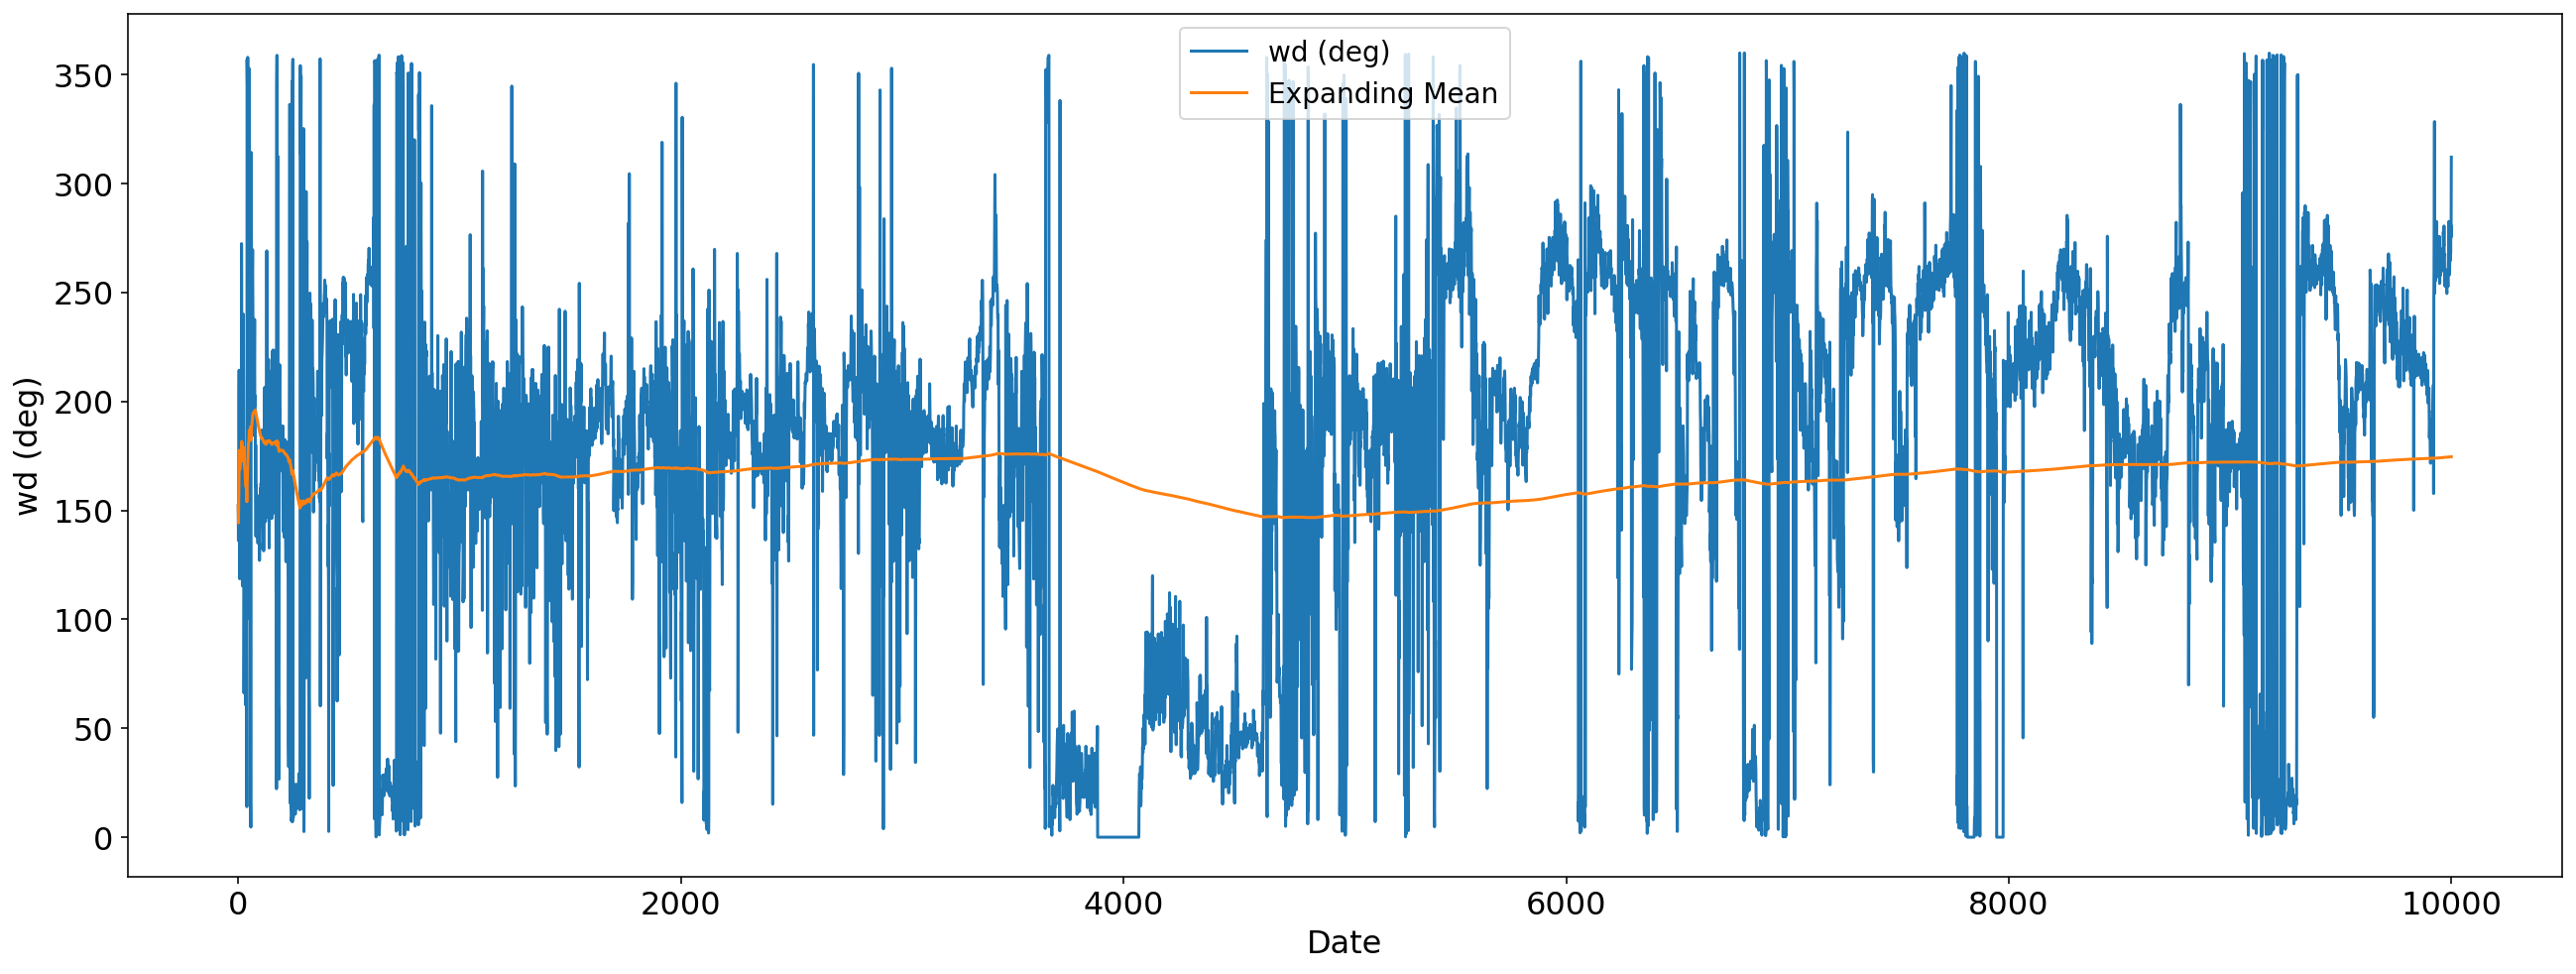

In [160]:
# ref: https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
plt.figure(figsize=(22,8))
col_name = 'wd (deg)'
to_val = 10000

df_mean = df[col_name][0:to_val].expanding().mean()
# df_std = df['p (mbar)'][0:1000].expanding().std()
df[col_name][0:to_val].plot()
df_mean.plot()
# df_std.plot()
plt.legend([col_name, 'Expanding Mean'], fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.ylabel(col_name, fontsize=16)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

### Autocorrelation and Partial Autocorrelation

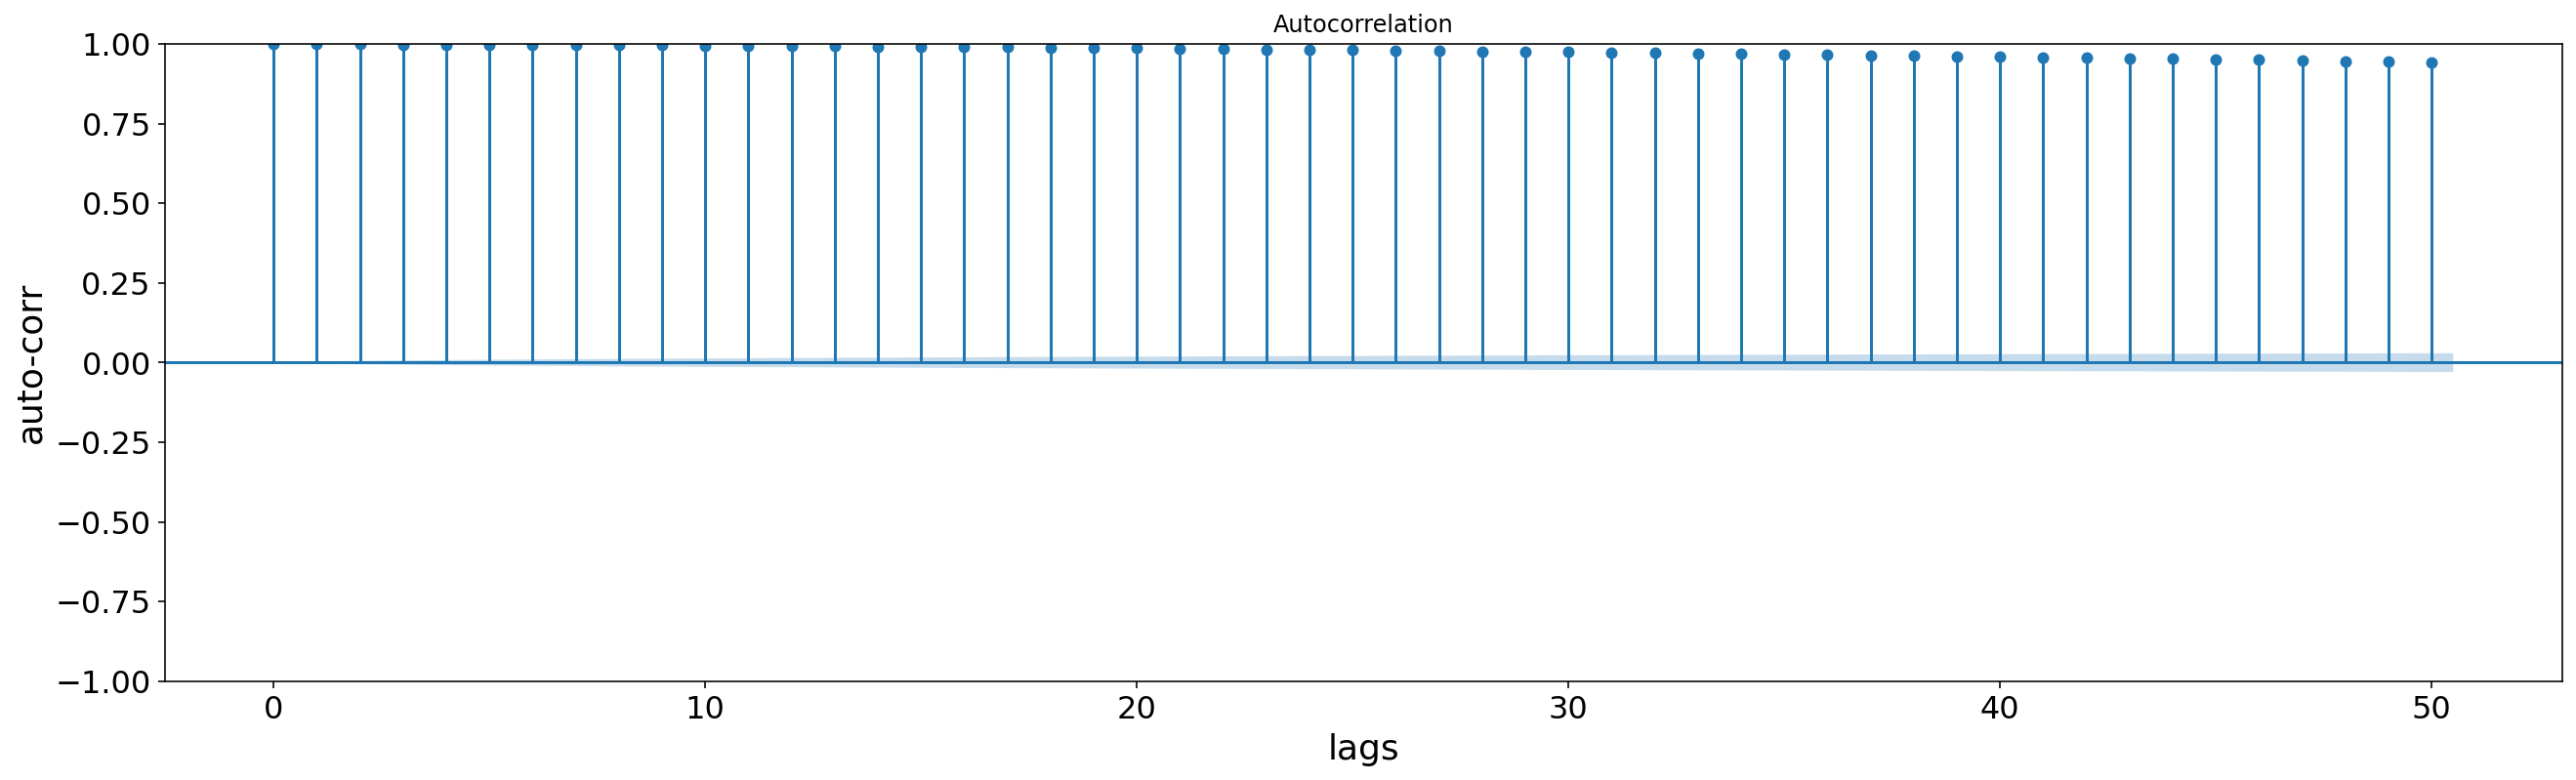

In [161]:
plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_acf(df['p (mbar)'].values.squeeze(), lags=50)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

the above plot indicates that past values influence the current value for pressure parameter.

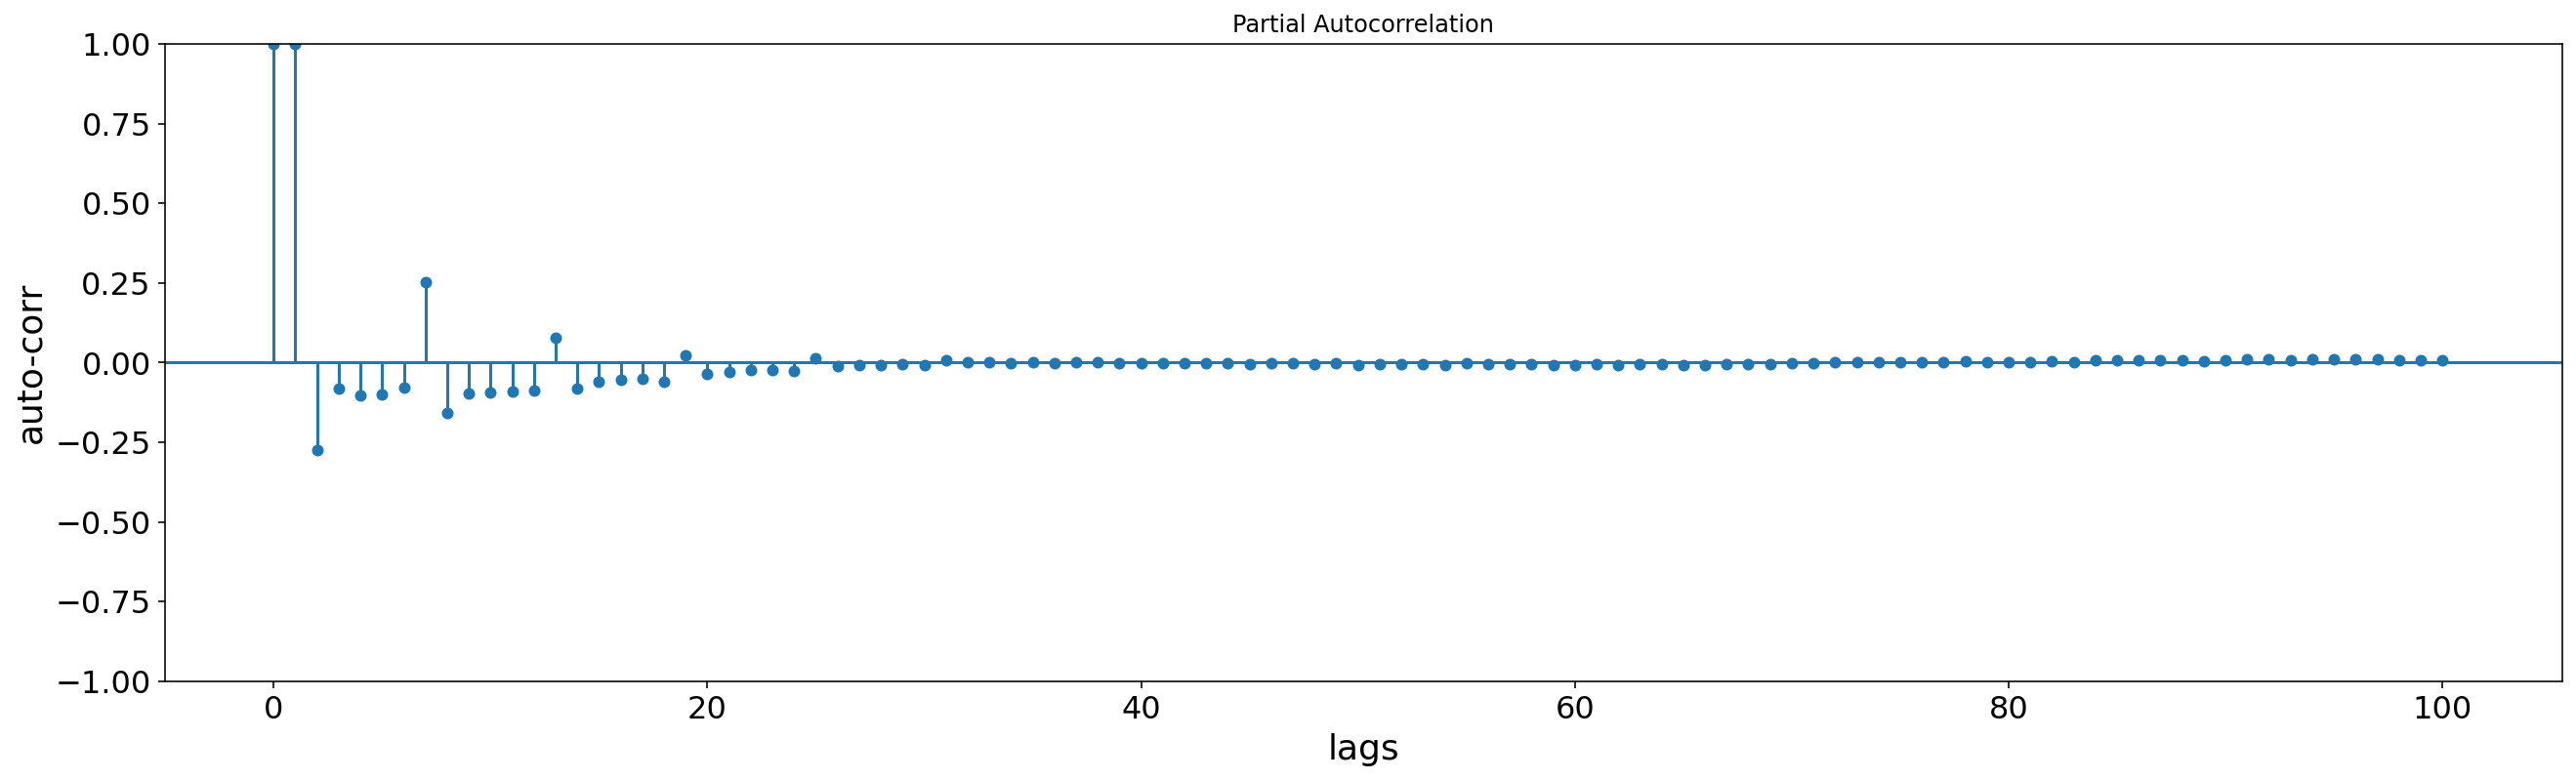

In [162]:
plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_pacf(df['p (mbar)'].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.show()

as it is observed the partial autocorrelation after two lags are pretty low which is sign of stationary data.

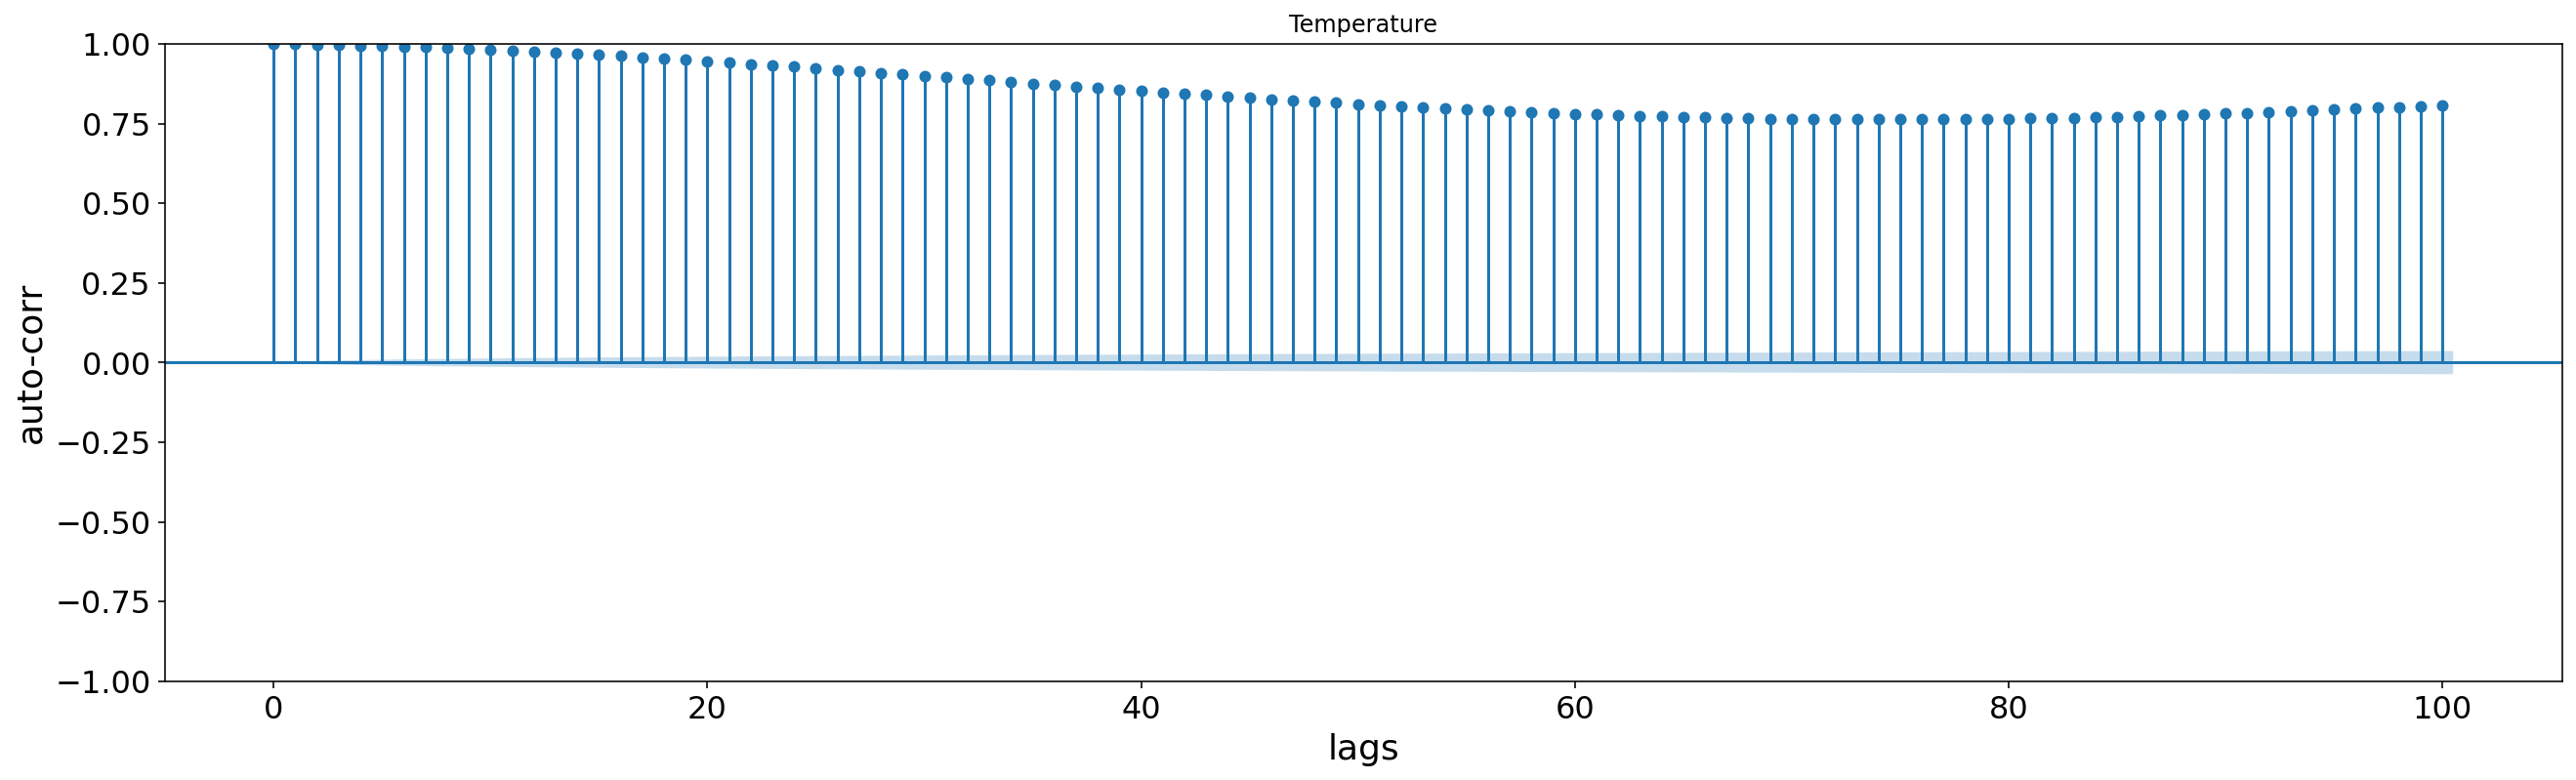

In [163]:
plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_acf(df['T (degC)'].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("Temperature")
plt.show()

the data gradually decay which is a sign of non-stationary data. Let's use the differencing method to make data stationery.

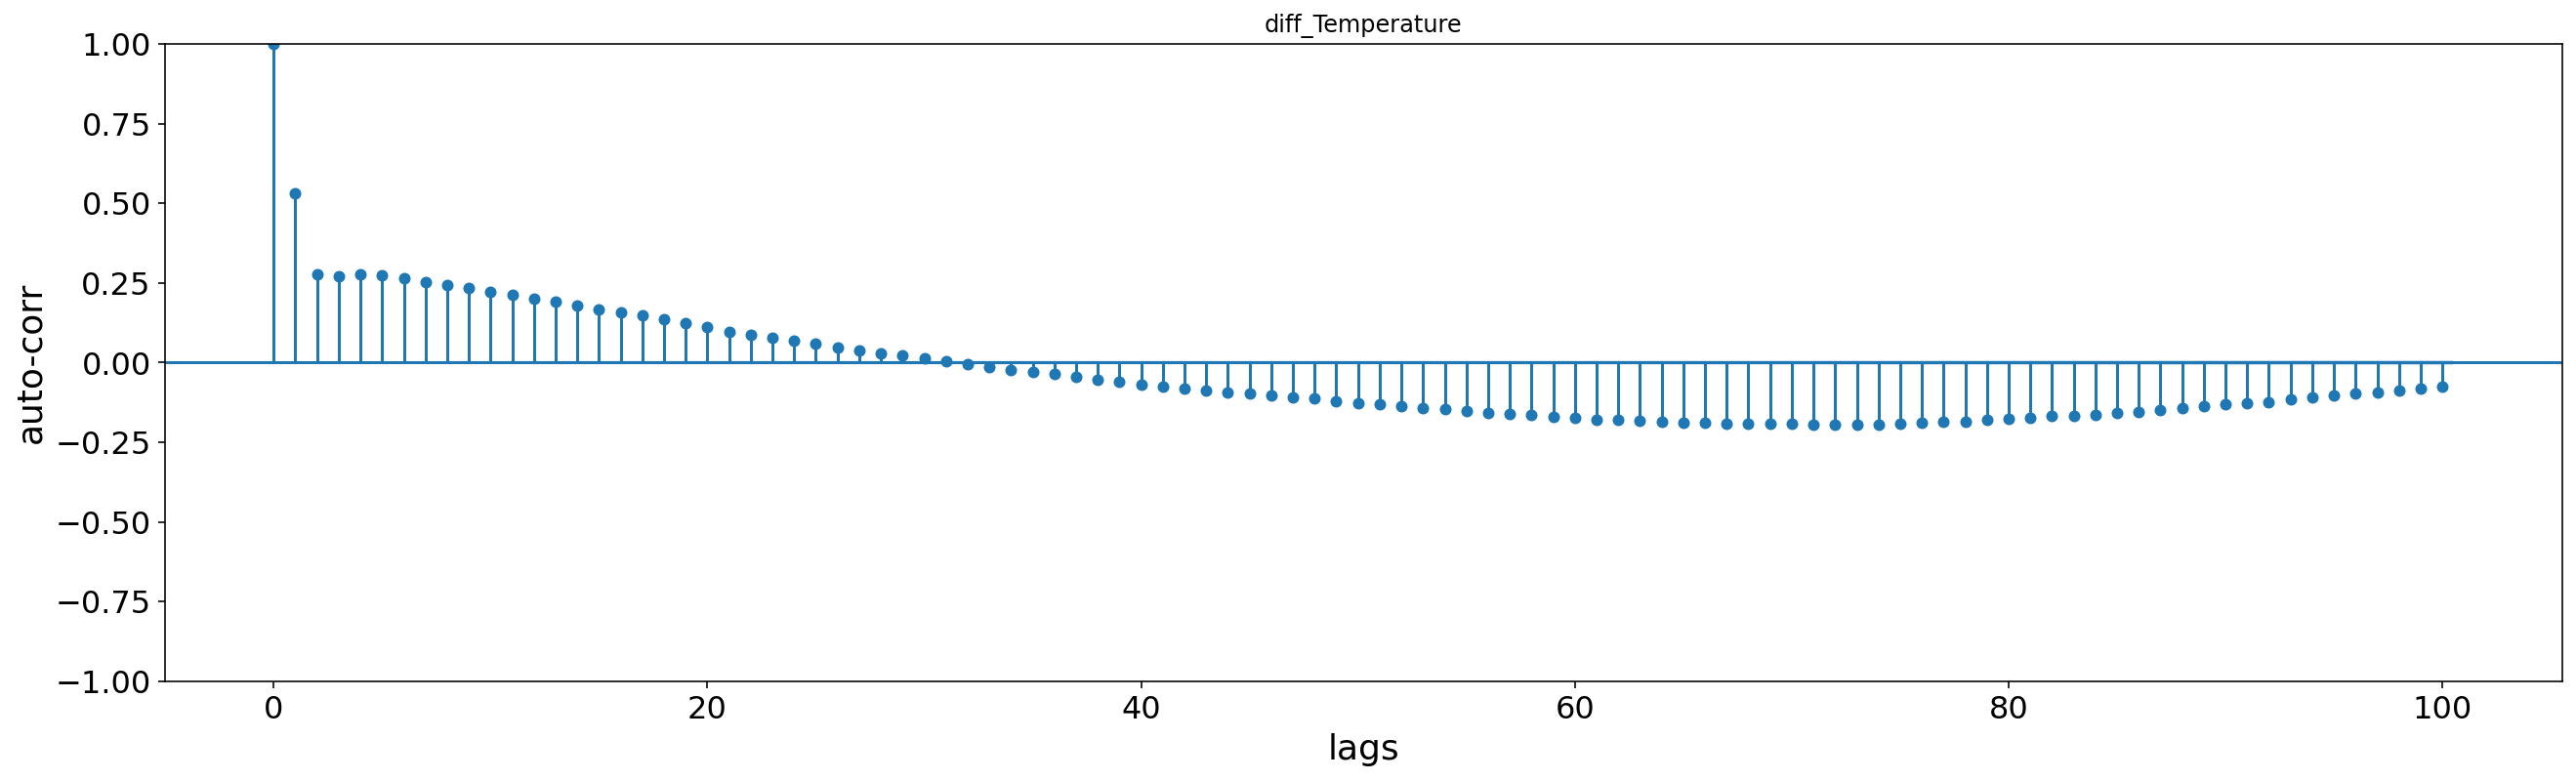

In [164]:
pri = 1
temp_diff = df['T (degC)'].diff(periods=pri)

plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_acf(temp_diff[pri:].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("diff_Temperature")
plt.show()

it is seen that the autocorrelation decay sharply (instantly) and now data is stationary. let's take a look at the diff temperature plot.

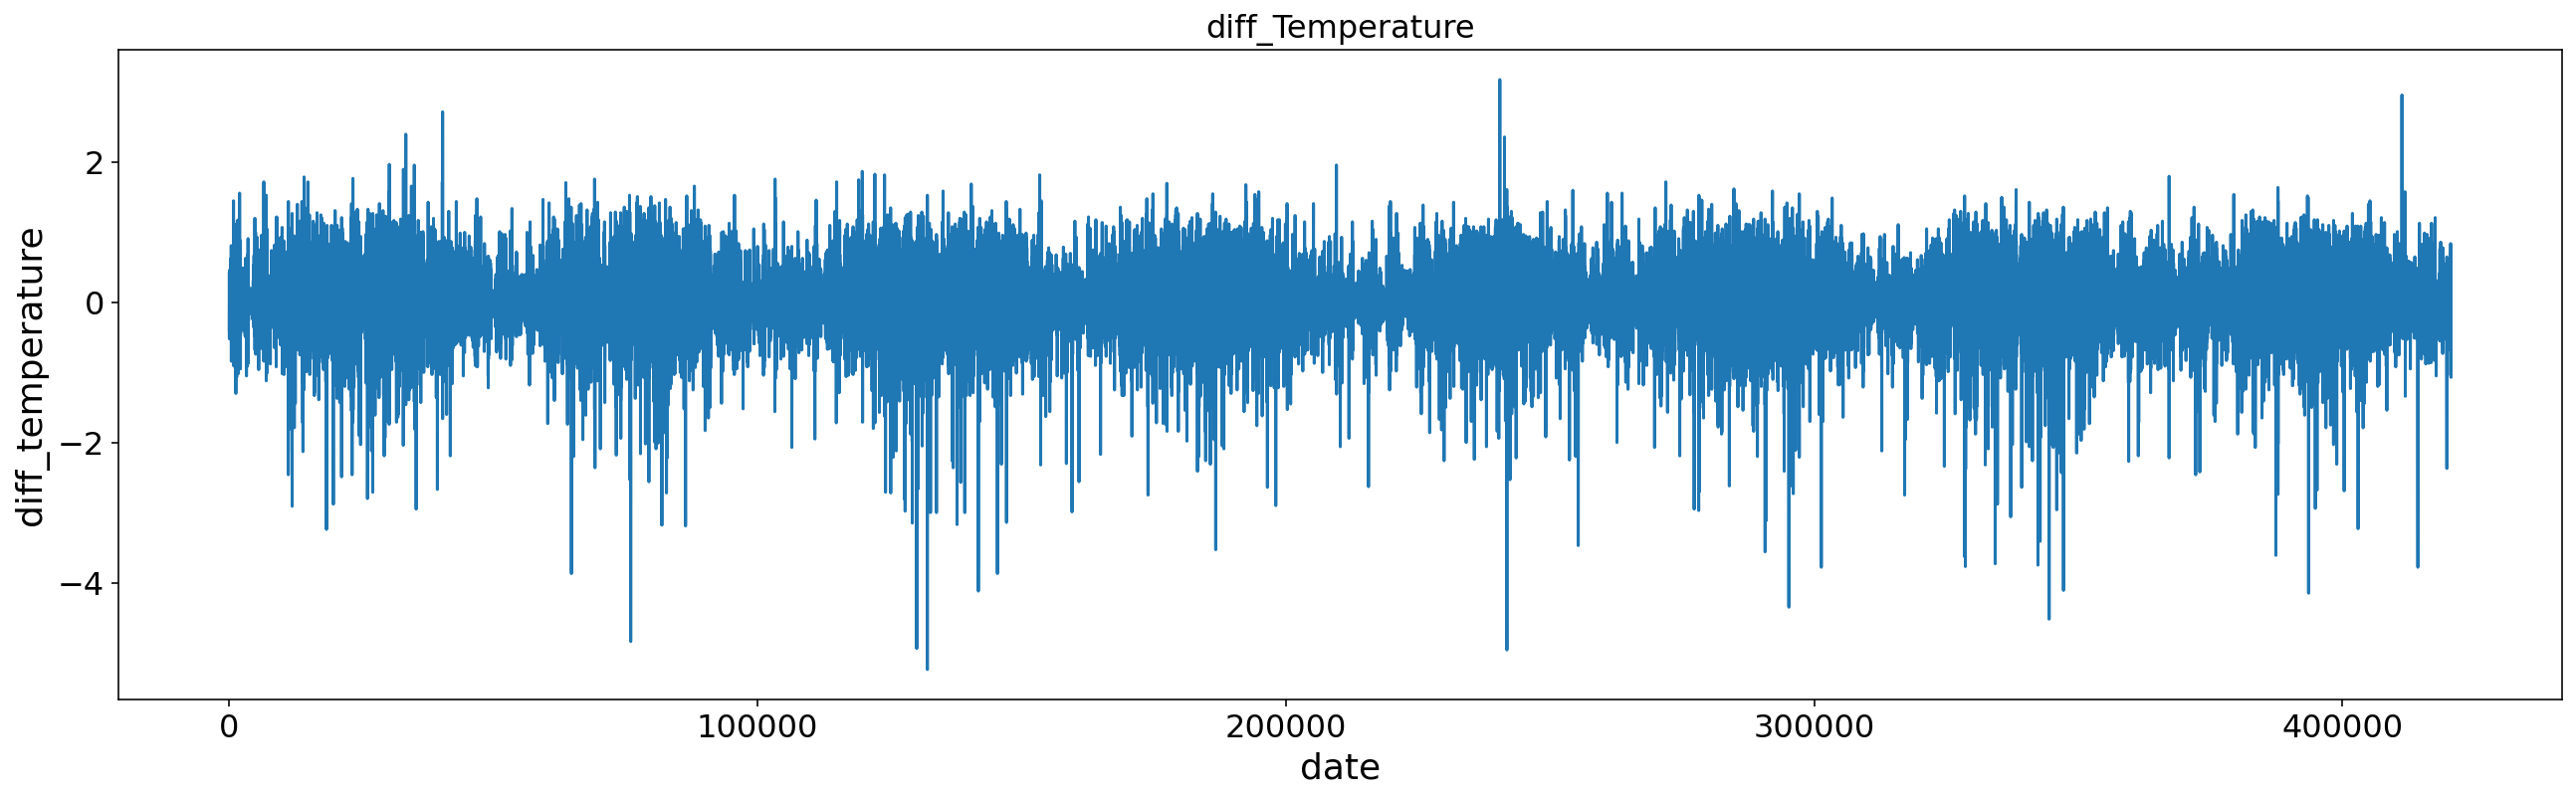

In [165]:
temp_diff.plot()
# df['T (degC)'].plot()
plt.xlabel('date', fontsize=18)
plt.ylabel('diff_temperature', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("diff_Temperature", fontsize=16)
plt.show()

In [ ]:
pri = 10
temp_diff = df['T (degC)'].diff(periods=pri)

plt.rc("figure", figsize=(22,6))
sm.graphics.tsa.plot_acf(temp_diff[pri:].values.squeeze(), lags=100)
plt.xlabel('lags', fontsize=18)
plt.ylabel('auto-corr', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("diff_Temperature")
plt.show()

In [ ]:
temp_diff.plot()
# df['T (degC)'].plot()
plt.xlabel('date', fontsize=18)
plt.ylabel('diff_temperature', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("diff_Temperature", fontsize=16)
plt.show()

the period = 1 provides the best stationary data considering the autocorrolation plots.

In [ ]:
plt.subplot(1,2,1)
# plt.plot(temp_diff)
df['T (degC)'].plot()
# df['T (degC)'].plot()
plt.xlabel('date', fontsize=18)
plt.ylabel('Temperature', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("Non Stationary", fontsize=16)


plt.subplot(1,2,2)
# plt.plot(temp_diff)
temp_diff.plot()
# df['T (degC)'].plot()
plt.xlabel('date', fontsize=18)
plt.ylabel('diff_Temperature', fontsize=18)
plt.xticks(fontsize=16),plt.yticks(fontsize=16)
plt.title("Stationary", fontsize=16)
plt.show()


plt.show()

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# plot_acf(temp_diff[1:])
# plt.show()